## Behavioral Risk Factor Surveillance System

#### Installing Dependencies

In [369]:
# Installing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.io as pio
import os
# Importing so that plotly works offline
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plt.style.use('ggplot')
from functools import reduce
from scipy import stats

# Setting up so that the figures show up in the notebook:
init_notebook_mode(connected=True) 

#### Reading the CSV into a DataFrame.

In [370]:
%%time
# reading the csv into a dataframe
file_path = "./Resources/behavioral_revised_data_final.csv"
behavior_data = pd.read_csv(file_path)

# Verifying Image directory to store images
if not os.path.exists('Images'):
    os.mkdir('Images')

Wall time: 180 ms


#### Finding any Correlation among features.

In [371]:
behavior_data.corr()

,Weight(lbs),Height(ft),Vegetables/Day,Fruits/Day,Physical Activity/Day(mints),Alcohol/Day
Weight(lbs),1.000000,0.543545,-0.092949,-0.079872,-0.043625,0.134069
Height(ft),0.543545,1.000000,-0.077631,-0.046853,0.020995,0.162509
Vegetables/Day,-0.092949,-0.077631,1.000000,0.372376,0.051116,-0.065677
Fruits/Day,-0.079872,-0.046853,0.372376,1.000000,0.050804,-0.085544
Physical Activity/Day(mints),-0.043625,0.020995,0.051116,0.050804,1.000000,-0.017736
Alcohol/Day,0.134069,0.162509,-0.065677,-0.085544,-0.017736,1.000000


In [372]:
# Total count of all diseases.
# Preparing DataSet
bp_count = len(behavior_data[behavior_data["Blood Pressure"] == 'Yes'])
diabetes_count = len(behavior_data[(behavior_data["Diabetes"] == "Yes") | (behavior_data["Diabetes"] =="Borderline")])
cancer_count = len(behavior_data[behavior_data["Cancer"] =='Yes'])
chol_count = len(behavior_data[behavior_data["Cholestrol"] == 'Yes'])
heart_count = len(behavior_data[behavior_data["Heart Disease"] == 'Yes'])


#### Age Groups Vs Disease Types

In [373]:
# Calculating the percentages
bp_per = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Age").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Age").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Age").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Age").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Age").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
age_disease_data = pd.DataFrame( {"High BP" : bp_per ,"Cancer": cancer_per , 
                                  "Cholestrol" : chol_per, "Heart" : heart_per , "Diabetes" : diabetes_per})
# Formatting the DataFrame
age_disease_data_formatted = age_disease_data.applymap(lambda x: f'{x: .2f}%')
age_disease_data_formatted

,High BP,Cancer,Cholestrol,Heart,Diabetes
Age,,,,,
18-24,0.47%,0.12%,0.30%,0.09%,0.31%
25-29,0.90%,0.41%,0.79%,0.29%,0.76%
30-34,1.99%,1.13%,1.74%,0.26%,1.73%
35-39,2.59%,1.54%,2.70%,0.41%,2.72%
40-44,3.17%,1.74%,3.62%,1.22%,3.66%
45-49,4.46%,2.53%,4.94%,1.66%,4.56%
50-54,7.63%,5.43%,8.40%,4.82%,7.74%
55-59,11.48%,8.56%,12.39%,8.22%,11.45%
60-64,14.74%,12.03%,15.27%,12.90%,15.28%


In [374]:
# Setting a color scheme
color_values = { "High BP": "Coral" , "Cancer" : "lightgreen", "Cholestrol" : "gold" , "Heart" : "Cyan" , "Diabetes":"Grey"}

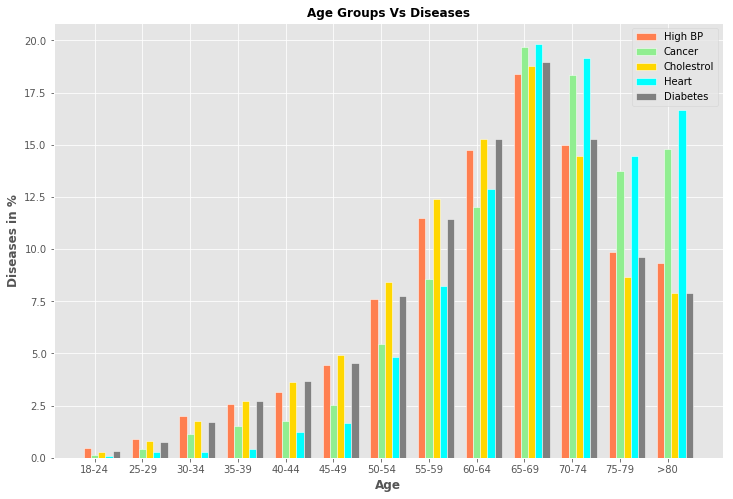

In [375]:
 #Build subplot with three rows and two columns
fig, ax  = plt.subplots(figsize=(12, 8))
#fig, ax = plt.subplots(figsize=(10,7)) 

# set width of bar
bar_width = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(age_disease_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3] 
r5 = [x + bar_width for x in r4]

# Make the plot
plt.bar(r1, age_disease_data["High BP"], color=color_values["High BP"],  width=bar_width, edgecolor='white', label='High BP')
plt.bar(r2, age_disease_data["Cancer"], color=color_values["Cancer"] , width=bar_width, edgecolor='white', label='Cancer')
plt.bar(r3, age_disease_data["Cholestrol"], color=color_values["Cholestrol"], width=bar_width, edgecolor='white', label='Cholestrol')
plt.bar(r4, age_disease_data["Heart"], color=color_values["Heart"], width=bar_width, edgecolor='white', label='Heart')
plt.bar(r5, age_disease_data["Diabetes"], color=color_values["Diabetes"],  width=bar_width, edgecolor='white', label='Diabetes')

# Add xticks on the middle of the group bars
plt.xlabel("Age", fontweight='bold' , fontsize = 'large')
plt.xticks([r + bar_width for r in range(len(age_disease_data))], age_disease_data.index)
plt.title("Age Groups Vs Diseases", fontweight='bold', fontsize='large')
plt.ylabel("Diseases in %", fontweight='bold', fontsize = 'large')

 
# Create legend & Show graphic
lgnd = plt.legend()

fig.savefig("./Images/age_disease.png")


plt.show()

#### Gender Vs Disease Types

In [376]:
# Calculating the Percentages
bp_per_sex = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Sex").count()["Blood Pressure"].astype("float64") /bp_count * 100
diabetes_per_sex = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Sex").count()["Diabetes"].astype("float64")/ diabetes_count * 100
cancer_per_sex = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Sex").count()["Cancer"].astype("float64") / cancer_count * 100
chol_per_sex = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Sex").count()["Cholestrol"].astype("float64") / chol_count * 100
heart_per_sex = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Sex").count()["Heart Disease"].astype("float64") / heart_count * 100

# Creating the DataFrame
sex_disease_data = pd.DataFrame( {"High BP" : bp_per_sex ,"Cancer": cancer_per_sex , 
                                  "Cholestrol" : chol_per_sex, "Heart" : heart_per_sex , "Diabetes" : diabetes_per_sex})
# Formatting the DataFrame
sex_disease_data_formatted = sex_disease_data.applymap(lambda x: f'{x: .2f}%')
sex_disease_data_formatted

,High BP,Cancer,Cholestrol,Heart,Diabetes
Sex,,,,,
Female,41.76%,51.66%,44.54%,26.23%,38.39%
Male,58.24%,48.34%,55.46%,73.77%,61.61%


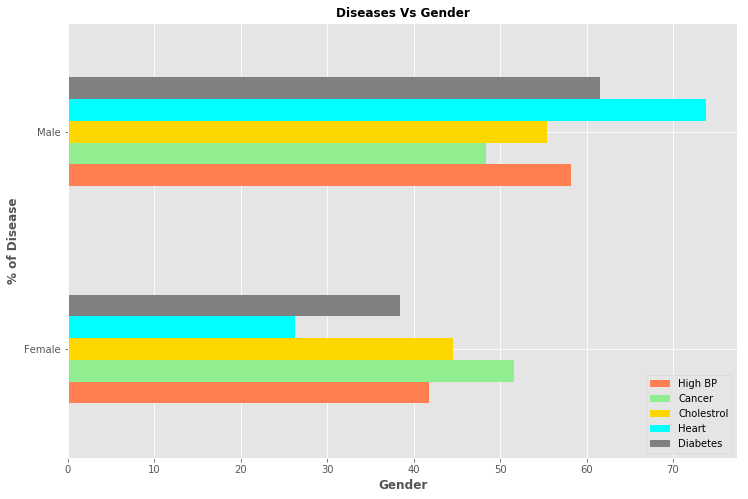

In [377]:
#Plot for Gender Vs Diseases
fig, ax  = plt.subplots(figsize=(12, 8))

sex_disease_data.plot(kind="barh", ax=ax, colors = ["Coral", "lightgreen", "gold", "Cyan", "grey"])

plt.title('Diseases Vs Gender', fontweight="bold", fontsize="large")
plt.xlabel('Gender',  fontweight="bold", fontsize="large")
plt.ylabel("% of Disease", fontweight="bold", fontsize="large")



fig.savefig("./Images/gender_disease.png")

plt.show()

#### Impact of Habits on Weight

In [378]:
# Creating the dataset
grouped_data = behavior_data.groupby("State").mean()
fruits_avg_state = grouped_data["Fruits/Day"]
weight_avg_state = grouped_data["Weight(lbs)"]
vegg_avg_state = grouped_data["Vegetables/Day"]
avg_physical_activity = grouped_data["Physical Activity/Day(mints)"]
avg_alcohol = grouped_data["Alcohol/Day"]

* Trend of Fruits and Veggie Consumption on Weight.

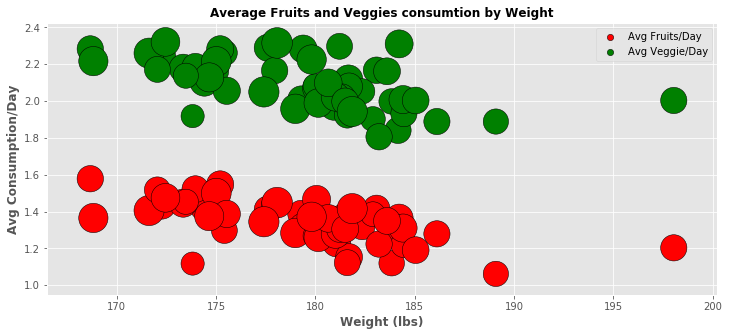

In [379]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = fruits_avg_state 
x = weight_avg_state
y1 = vegg_avg_state
# Drawing the scatter plot
plt.scatter(x,y, s= avg_physical_activity * 10,  marker='o', facecolor='red', edgecolor="black")
plt.scatter( x, y1,  s= avg_physical_activity * 10, marker='o', color='green', edgecolor="black")

plt.xlabel("Weight (lbs)", fontweight="bold", fontsize="large")
plt.ylabel("Avg Consumption/Day",fontweight="bold", fontsize="large")
lgnd = plt.legend(['Avg Fruits/Day', 'Avg Veggie/Day'])
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
plt.title("Average Fruits and Veggies consumtion by Weight", fontweight="bold",fontsize="large")


fig.savefig("./Images/fruit_veggie_wt.png")

plt.show()

* Trend of Physical Activities with Weight

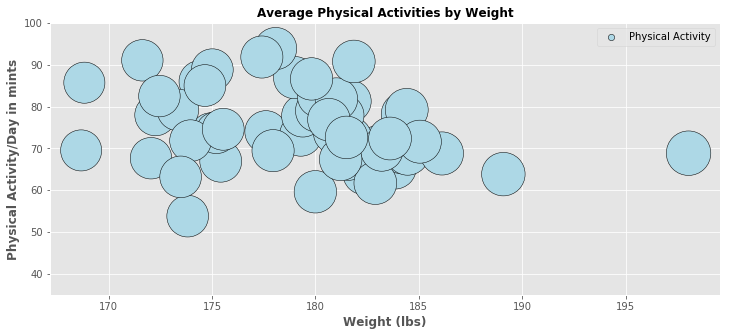

In [380]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_physical_activity
x = weight_avg_state
plt.scatter(x,y,s= weight_avg_state * 10 , marker='o',  facecolors="lightblue", edgecolors="black" , label = "Physical Activity")

plt.xlabel("Weight (lbs)", fontweight = "bold" , fontsize="large")
plt.ylabel("Physical Activity/Day in mints", fontweight = "bold" , fontsize="large")
plt.title("Average Physical Activities by Weight", fontweight = "bold" , fontsize="large")
plt.ylim(35,100)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    
fig.savefig("./Images/physical_wt.png")
plt.show()


* Trend of Drinking Habit with Weight

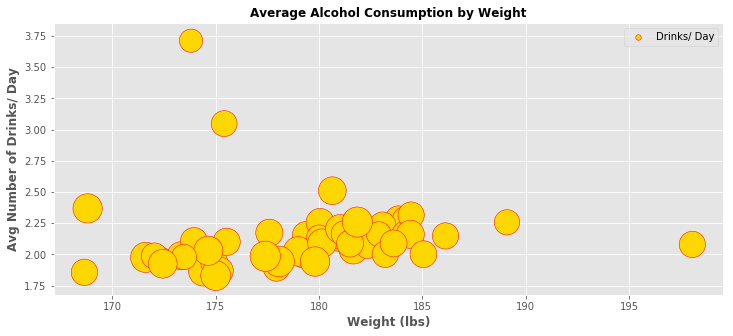

In [381]:
fig, ax  = plt.subplots(figsize=(12, 5))
y = avg_alcohol
x = weight_avg_state
plt.scatter(x,y, s= avg_physical_activity * 10, marker='o',  facecolors="Gold", edgecolors="red" ,label = "Drinks/ Day")

plt.xlabel("Weight (lbs)", fontweight="bold", fontsize="large")
plt.ylabel("Avg Number of Drinks/ Day", fontweight="bold", fontsize="large")
# plt.legend(['Avg Physical Activity/Day'])
plt.title("Average Alcohol Consumption by Weight", fontweight="bold", fontsize="large")
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    
fig.savefig("./Images/alcohol_wt.png")
    
plt.show()

* Trend of Smoking with Weight

In [382]:
# Fathering Data
grouped_smoking = behavior_data.groupby(["Smoking"]).mean()
grouped_smoking = grouped_smoking.reindex(["Not at all", "Some days", "Every day"])



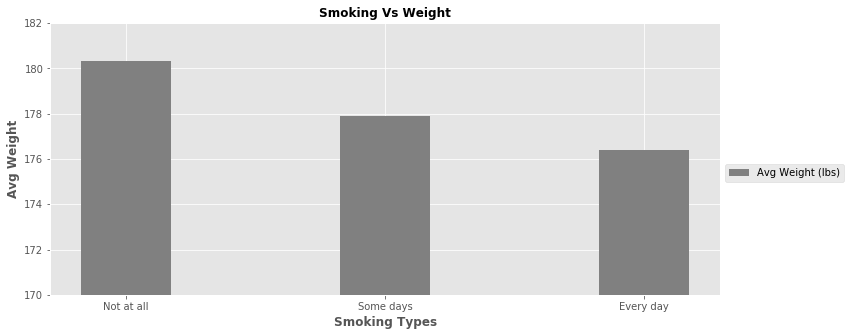

In [383]:
fig, ax  = plt.subplots(figsize=(12, 5))
width = 0.35
p1 = plt.bar(grouped_smoking.index, grouped_smoking["Weight(lbs)"],  width , color="gray" )
plt.legend(["Avg Weight (lbs)"], bbox_to_anchor=(1, 0.5))
plt.ylim(170,182)
plt.xlabel("Smoking Types", fontweight="bold", fontsize="large")
plt.ylabel("Avg Weight", fontweight="bold", fontsize="large")
plt.title("Smoking Vs Weight", fontweight="bold", fontsize="large")

fig.savefig("./Images/smoking_wt.png")
plt.show()

#### State Vs Diseases

In [384]:
# Gathering the data.
state_disease_all = behavior_data.groupby("State Code").count()["Cancer"] + \
                      behavior_data.groupby("State Code").count()["Blood Pressure"] + \
                      behavior_data.groupby("State Code").count()["Cholestrol"] + \
                      behavior_data.groupby("State Code").count()["Heart Disease"] + \
                      behavior_data.groupby("State Code").count()["Diabetes"]

state_disease_cancer  = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("State Code").count()["Cancer"]
state_disease_bp      = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("State Code").count()["Blood Pressure"]
state_disease_chol    = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("State Code").count()["Cholestrol"]
state_disease_heart   = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("State Code").count()["Heart Disease"]
state_disease_diabetes = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("State Code").count()["Diabetes"]

# Processing Data to calculate total disease percentage by states.
state_disease_yes = state_disease_cancer + state_disease_bp + state_disease_chol + state_disease_heart + state_disease_diabetes
state_disease_perc = round(state_disease_yes / state_disease_all  * 100,2).sort_values()
state_perc_top5 = state_disease_perc.head(10)
state_perc_least5 = state_disease_perc.tail(10)
state_disease_perc = pd.DataFrame(state_disease_perc, columns=["Total Disease %"])
print("Top 5 healthy States")
state_disease_perc.head(5)


Top 5 healthy States


,Total Disease %
State Code,
GU,17.86
VT,18.41
UT,19.44
CO,19.83
MN,20.26


In [385]:
print("Least 5 healthy States")
state_disease_perc.tail(5)


Least 5 healthy States


,Total Disease %
State Code,
MS,24.96
LA,25.26
MD,25.47
PR,25.97
AR,25.98


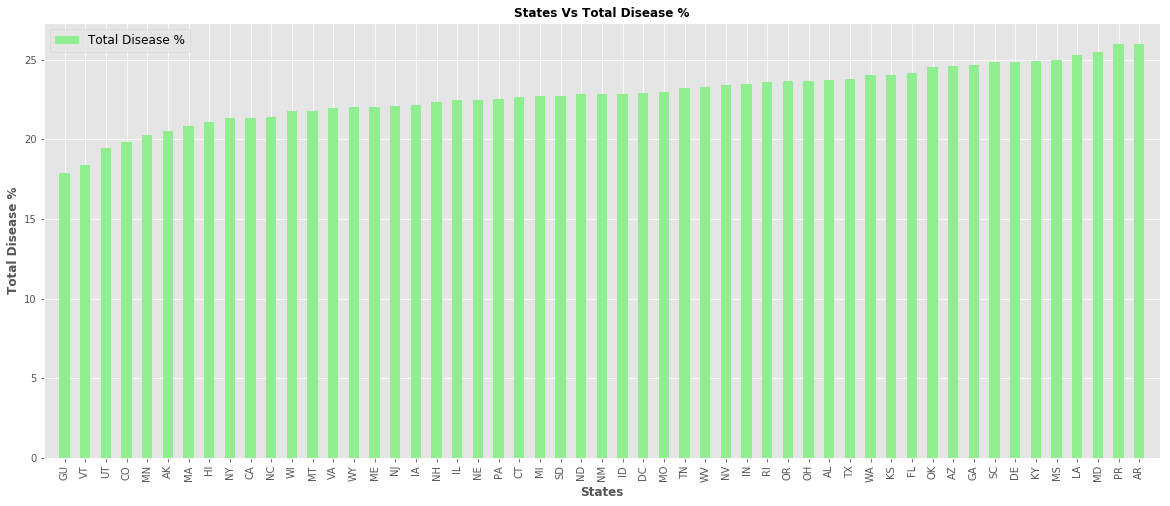

In [386]:
# Plotting line plot
fig, ax  = plt.subplots(figsize=(20, 8))
lp = state_disease_perc.plot(kind="bar",ax = ax , color = "lightgreen" , grid=True)
lp.set_xlabel("States" , fontweight="bold", fontsize="large")
lp.set_ylabel("Total Disease %", fontweight="bold", fontsize="large")
lp.set_xlim(-1,53)
lp.set_title("States Vs Total Disease %", fontweight="bold", fontsize="large")
plt.legend(fontsize="large", fancybox=True)
fig.savefig("./Images/state_diseases.png")
plt.show()

#### Finding the Top 10 Healthy States based on Reported Diseases.

In [387]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_least5.index,
            z = state_perc_least5.values,
            locationmode = 'USA-states',
            text = state_perc_least5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [388]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Least 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [389]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/least_healthy_10.png')

#### Finding the Least 10 Healthy States based on Reported Diseases.

In [390]:
# Now out data dictionary with some extra marker and colorbar arguments:
data = dict(type='choropleth',
            colorscale = 'Portland',
            reversescale = True,
            locations = state_perc_top5.index,
            z = state_perc_top5.values,
            locationmode = 'USA-states',
            text = state_perc_top5.index,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Diseases %"}
            ) 

In [391]:
# And our layout dictionary with some more arguments:
layout = dict(title = 'Top 10 Healthy States by percentage of reported Diseases.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,170,255)')
             )

In [392]:
choromap = go.Figure(data = [data],layout = layout)
# plot(choromap,validate=False)
iplot(choromap)
pio.write_image(choromap, './Images/top_healthy_10.png')

#### Country level Disease percentages based on responses.

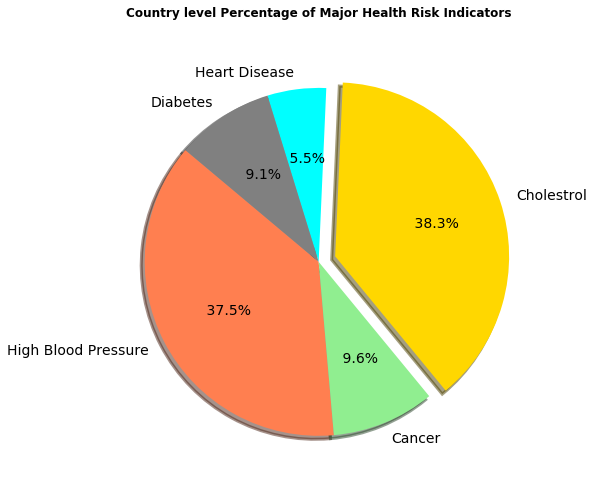

In [393]:
# Gathering Data and plotting Pie chart
fig, ax  = plt.subplots(figsize=(12, 8))

total_respondents = behavior_data.count()[0]

cancer_perc = cancer_count / total_respondents * 100
bp_perc =  bp_count / total_respondents * 100
chol_perc = chol_count / total_respondents * 100
heart_perc = heart_count / total_respondents * 100
diabetes_perc = diabetes_count / total_respondents * 100

disease_perc = [ bp_perc, cancer_perc, chol_perc , heart_perc , diabetes_perc]
pies = ["High Blood Pressure" ,"Cancer", "Cholestrol" , "Heart Disease", "Diabetes"]
#color_values = { "BP": "Coral" , "Cancer" : "lightgreen", "Cholestrol" : "gold" , "Heart" : "Cyan" , "Diabetes":"Grey"}
colors = ["Coral","lightgreen","gold","Cyan","Grey"]
# colors = ["Coral", "lightgreen", "gold", "yellowgreen", "grey"]

explode = (0,0,0.1,0,0)
          
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(disease_perc, explode=explode, labels=pies, colors=colors, autopct=lambda x: f'{x: .1f}%', 
        shadow=True, startangle=140, wedgeprops = {'linewidth': 3}, textprops={'fontsize': 14})

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
ttl = plt.title("Country level Percentage of Major Health Risk Indicators", fontweight="bold", fontsize="large")
ttl.set_position([.5, 1.05])

# Save an image of our chart and print the final product to the screen

fig.savefig("./Images/DieseasesPie.png")

plt.show()

#### BMI Vs Diseases

In [395]:
cancer_by_bmi = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("BMI").count()["Cancer"]
bp_by_bmi = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("BMI").count()["Blood Pressure"]
chol_by_bmi = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("BMI").count()["Cholestrol"]
heart_by_bmi = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("BMI").count()["Heart Disease"]
diabetes_by_bmi = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("BMI").count()["Diabetes"]
bmis = [cancer_by_bmi, bp_by_bmi, chol_by_bmi , heart_by_bmi, diabetes_by_bmi]
bmi_final = reduce(lambda left,right: pd.merge(left,right,on='BMI'), bmis)
bmi_final = bmi_final.reindex(["Underweight", "Normal Weight", "Overweight", "Obese"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
bmi_final

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
BMI,,,,,
Underweight,79,177,159,28,25
Normal Weight,2075,5658,6423,811,941
Overweight,2490,9953,10541,1474,2185
Obese,1393,7883,7074,1129,2614


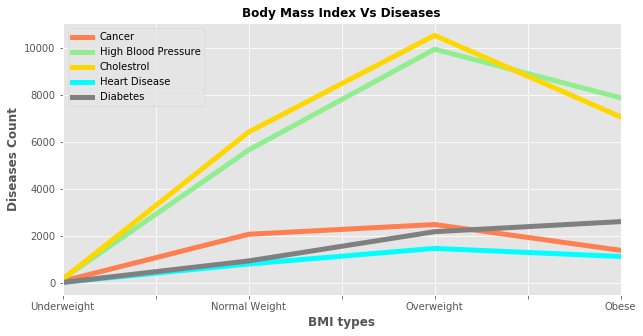

In [396]:
fig, ax = plt.subplots(figsize=(10, 5) )
p1 = bmi_final.plot(ax=ax, lw= 5, colors = ["Coral","lightgreen","gold","Cyan","Grey"])
p1.set_xlabel("BMI types" ,fontweight = "bold", fontsize="large")
p1.set_ylabel("Diseases Count", fontweight = "bold", fontsize="large")
p1.set_title("Body Mass Index Vs Diseases", fontweight="bold", fontsize="large")
fig.savefig("./Images/bmi_diseases.png")
plt.show()


#### Education Vs Diseases

In [397]:
cancer_by_education = behavior_data[behavior_data["Cancer"] == "Yes"].groupby("Education").count()["Cancer"]
bp_by_education = behavior_data[behavior_data["Blood Pressure"] == "Yes"].groupby("Education").count()["Blood Pressure"]
chol_by_education = behavior_data[behavior_data["Cholestrol"] == "Yes"].groupby("Education").count()["Cholestrol"]
heart_by_education = behavior_data[behavior_data["Heart Disease"] == "Yes"].groupby("Education").count()["Heart Disease"]
diabetes_by_education = behavior_data[behavior_data["Diabetes"] == "Yes"].groupby("Education").count()["Diabetes"]
edus = [cancer_by_education, bp_by_education, chol_by_education , heart_by_education, diabetes_by_education]
education_final = reduce(lambda left,right: pd.merge(left,right,on='Education'), edus)
education_final = education_final.reindex(["No School", "Elementary", "Junior High", "High School", "College 3yrs" ,"College 4yrs"]).rename(columns={"Blood Pressure":"High Blood Pressure"})
education_final

,Cancer,High Blood Pressure,Cholestrol,Heart Disease,Diabetes
Education,,,,,
No School,2,7,6,1,2
Elementary,42,211,205,31,82
Junior High,129,715,645,114,199
High School,1296,5840,5606,822,1462
College 3yrs,1699,7099,7046,1018,1817
College 4yrs,2864,9782,10671,1450,2197


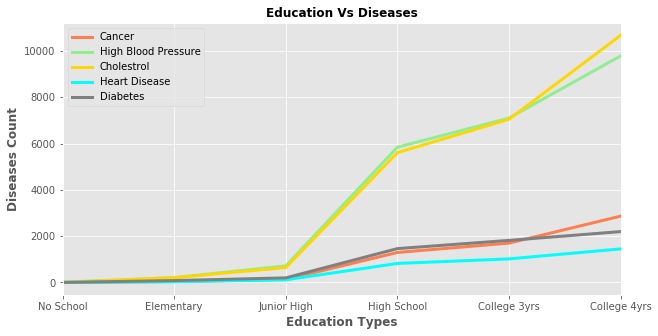

In [398]:
fig, ax = plt.subplots(figsize=(10, 5))
p1 = education_final.plot(ax=ax, lw= 3 , colors = ["Coral","lightgreen","gold","Cyan","Grey"])
p1.set_xlabel("Education Types" ,fontweight = "bold", fontsize="large")
p1.set_ylabel("Diseases Count", fontweight = "bold", fontsize="large")
p1.set_title("Education Vs Diseases", fontweight="bold", fontsize="large")
fig.savefig("./Images/education_diseases.png")
plt.show()

#### State Vs Fruits and Vegetables Consumption

In [399]:
# groupy by states
groupped_data = behavior_data.groupby(["State"])
groupped_data.head(1)

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128.0,4.99980,20000-25000,...,3.000000e+01,Every day,2.0,Overweight,Yes,Yes,No,No,No,No
741,Alaska,AK,Female,Divorced,60-64,White only,College 3yrs,230.0,5.99976,35000-50000,...,4.000000e+01,Not at all,2.0,Obese,No,Yes,No,No,No,No
1242,Arizona,AZ,Male,Married,60-64,White only,College 4yrs,188.0,6.16642,>75000,...,2.485714e+02,Not at all,1.0,Normal Weight,No,Yes,No,No,No,No
2297,Arkansas,AR,Male,Married,65-69,White only,College 4yrs,168.0,5.66644,>75000,...,4.857143e+01,Not at all,3.0,Overweight,No,Yes,No,No,No,No
2725,California,CA,Female,Divorced,70-74,White only,College 3yrs,125.0,5.58311,35000-50000,...,4.200000e+01,Every day,2.0,Normal Weight,Yes,Yes,No,No,No,No
4192,Colorado,CO,Female,Never married,18-24,White only,High School,150.0,5.41645,>75000,...,9.000000e+01,Every day,3.0,Normal Weight,No,No,No,No,No,No
6181,Connecticut,CT,Female,Married,65-69,White only,College 4yrs,114.0,5.41645,50000-75000,...,1.114286e+02,Not at all,1.0,Normal Weight,Yes,No,No,No,No,No
8100,Delaware,DE,Male,Married,65-69,White only,College 4yrs,169.0,5.74977,>75000,...,1.200000e+02,Not at all,2.0,Normal Weight,No,No,No,No,No,No
8640,District of Columbia,DC,Male,A member of an unmarried couple,30-34,White only,College 4yrs,176.0,5.83310,>75000,...,4.714286e+01,Not at all,6.0,Overweight,Yes,No,No,No,No,No
9328,Florida,FL,Male,Divorced,25-29,Hispanic,College 3yrs,230.0,5.99976,35000-50000,...,1.028571e+02,Every day,4.0,Obese,Yes,Yes,No,No,No,No


In [400]:
# state_fruit = groupped_data["Fruits/Day"].mean()
state_fruit = groupped_data["Fruits/Day"].mean()
fruit = state_fruit.sort_values(ascending=False).head(10)
fruit

State
District of Columbia    1.578270
Maine                   1.547511
Massachusetts           1.521763
New York                1.517571
Connecticut             1.503867
New Hampshire           1.499822
Vermont                 1.474619
Michigan                1.465914
Rhode Island            1.453083
Oregon                  1.448552
Name: Fruits/Day, dtype: float64

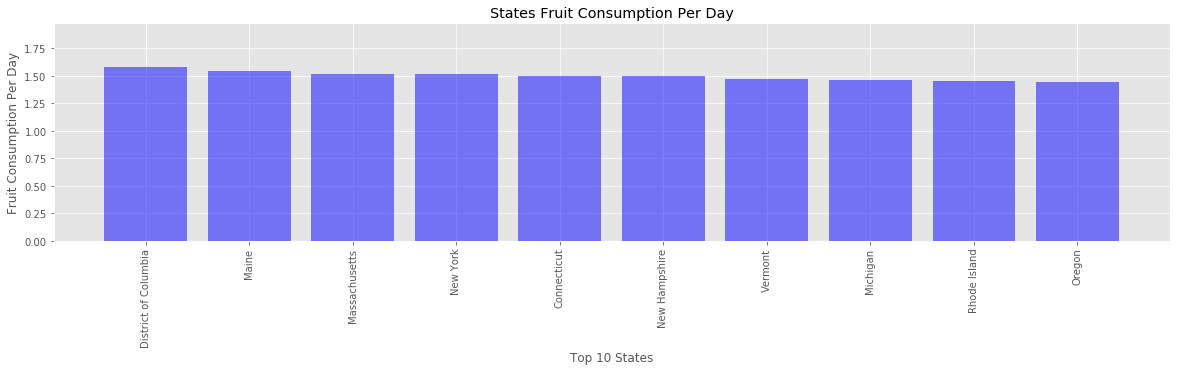

<Figure size 432x288 with 0 Axes>

In [348]:
# States vs Fruit Concumption Per Day
plt.figure(figsize=(20,4))
plt.ylim(0, max(fruit.values)+0.4)
plt.title("States Fruit Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Fruit Consumption Per Day")
plt.bar(fruit.index, fruit.values, color='b', alpha=0.5, align="center")
plt.xticks(fruit.index, rotation='vertical')
plt.show()
plt.savefig("./Images/Fruit_aconsumption.png")
plt.tight_layout()

In [360]:
# State vs vegtable cosumption per day
fruit = state_fruit.sort_values(ascending=False).head(10)

state_vegetable = groupped_data["Vegetables/Day"].mean()
vegatable =state_vegetable.sort_values(ascending=False).head(10)
vegatable

State
Vermont                 2.320850
Oregon                  2.315190
Alaska                  2.310080
Texas                   2.296888
California              2.288909
District of Columbia    2.282849
Georgia                 2.282520
Maine                   2.280922
Guam                    2.261548
Nevada                  2.259783
Name: Vegetables/Day, dtype: float64

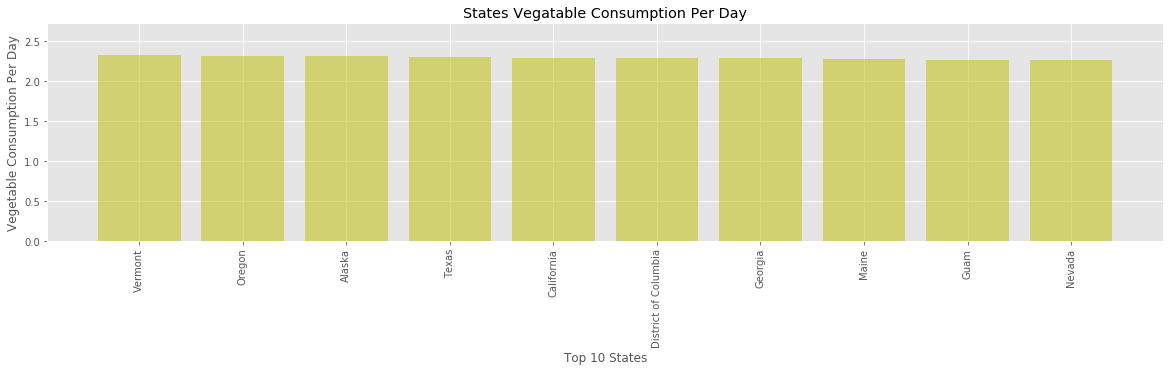

<Figure size 432x288 with 0 Axes>

In [361]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(vegatable.values)+0.4)
plt.title("States Vegatable Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Vegetable Consumption Per Day")
plt.bar(vegatable.index, vegatable.values, color='y', alpha=0.5, align="center")
plt.xticks(vegatable.index, rotation='vertical')
plt.savefig("./Images/Vegatable_consumption.png")

plt.show()
plt.tight_layout()

#### State Vs Physical Activity Per Day

In [401]:
#Physical Activity vs. state
state_physical = groupped_data["Physical Activity/Day(mints)"].mean()
state_physical.head()

State
Alabama       65.419318
Alaska        78.203023
Arizona       86.034394
Arkansas      80.585447
California    73.998831
Name: Physical Activity/Day(mints), dtype: float64

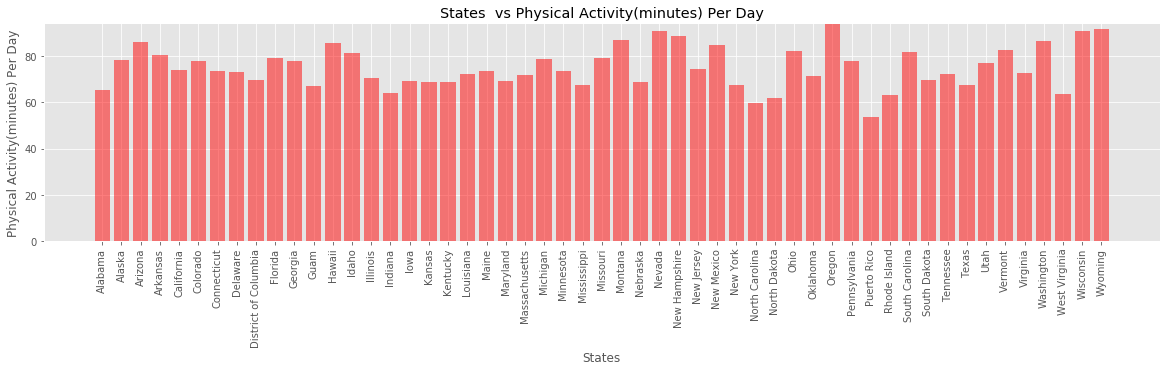

<Figure size 432x288 with 0 Axes>

In [402]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(state_physical.values)+0.4)
plt.title("States  vs Physical Activity(minutes) Per Day")
plt.xlabel("States")
plt.ylabel("Physical Activity(minutes) Per Day")
plt.bar(state_physical.index, state_physical.values, color='r', alpha=0.5, align="center")
plt.xticks(state_physical.index, rotation='vertical')
plt.savefig("./Images/Pyhsical_activity.png")

plt.show()
plt.tight_layout()

In [403]:
# Drinking vs. state
state_alchohol = groupped_data["Alcohol/Day"].mean()
alcohol = state_alchohol.sort_values(ascending=False).head(10)

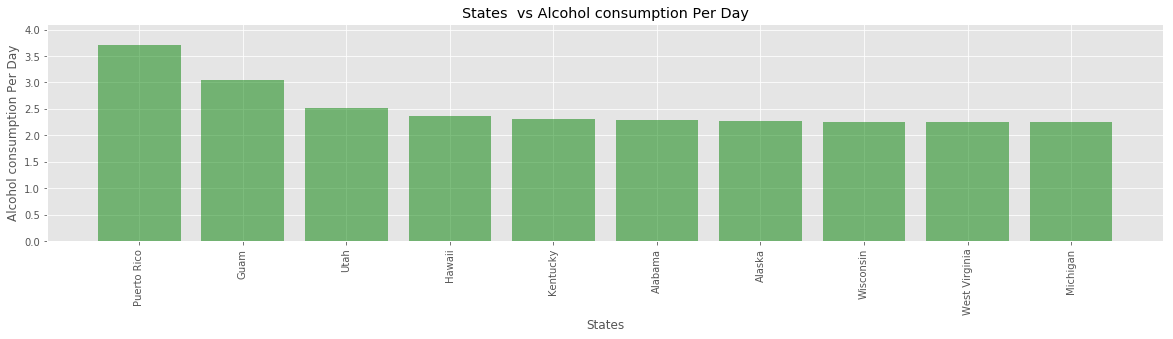

<Figure size 432x288 with 0 Axes>

In [404]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(alcohol.values)+0.4)
plt.title("States  vs Alcohol consumption Per Day")
plt.xlabel("States")
plt.ylabel("Alcohol consumption Per Day")
plt.bar(alcohol.index, alcohol.values, color='g', alpha=0.5, align="center")
plt.xticks(alcohol.index, rotation='vertical')
plt.savefig("./Images/State_alcohol.png")
plt.show()
plt.tight_layout()

#### States Vs Smoking

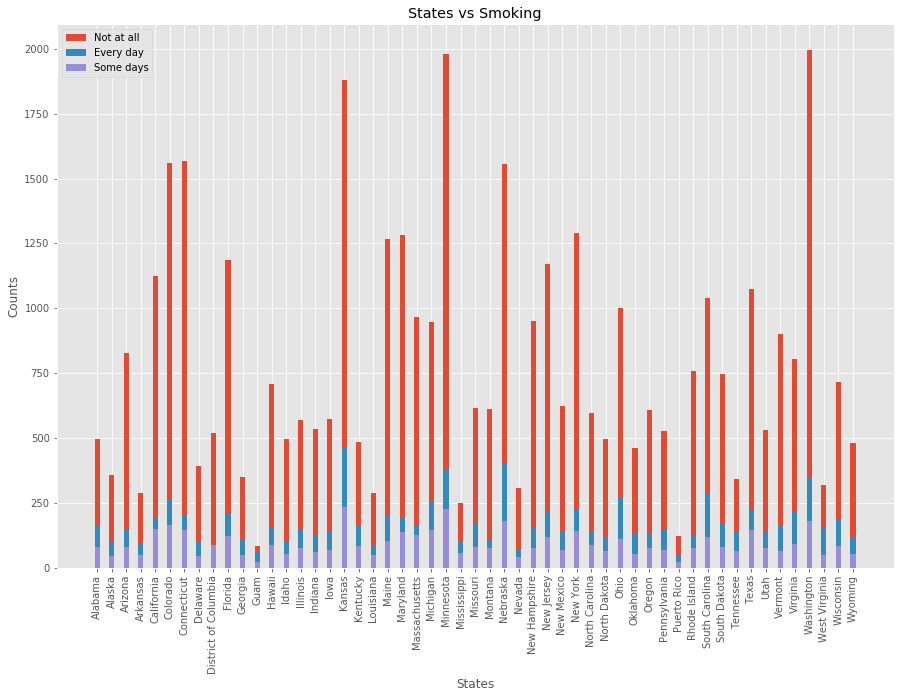

In [405]:
#Build subplot with three rows and two columns
N=5
fig = plt.figure(figsize=(15, 10))
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
not_at_all = behavior_data[behavior_data["Smoking"] == "Not at all"].groupby("State").count()["Smoking"]
every_day = behavior_data[behavior_data["Smoking"] == "Every day"].groupby("State").count()["Smoking"]
some_days = behavior_data[behavior_data["Smoking"] == "Some days"].groupby("State").count()["Smoking"]

p1 = plt.bar(not_at_all.index, not_at_all.values, width)
p2 = plt.bar(every_day.index, every_day.values, width)
p3 = plt.bar(some_days.index, some_days.values, width )

plt.legend((p1[0], p2[0] , p3[0]), ('Not at all', 'Every day', 'Some days'))
plt.title('States vs Smoking')
plt.xlabel('States')
plt.ylabel("Counts")
plt.xticks(state_alchohol.index, rotation='vertical')
plt.savefig("./Images/Smoking_Per_States.png")
plt.show()